In [85]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
df = pd.read_csv("./ValeursFoncieres-2025-S1_nice.csv")#, on_bad_lines='skip')
df.head()

,Index,Valeur fonciere,Commune,Code departement,Section,Nombre de lots,Surface reelle bati,Nombre pieces principales
0,1,68000.0,BARCELONNETTE,4,AD,1,-0.415715,-0.335072
1,3,305000.0,NICE,6,IR,1,0.591273,0.591787
2,7,398550.0,NICE,6,KV,1,0.244036,0.591787
3,9,67000.0,NICE,6,MA,1,-1.457426,-1.261930
4,13,365000.0,NICE,6,HC,1,0.834338,0.591787


In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf1', TfidfVectorizer(), 'Commune'),
        ('onehot1', OneHotEncoder(sparse_output=False, dtype=int), ['Section']),
    ],
    remainder='passthrough'  # Keep all other columns
)

df_x = df.drop(['Valeur fonciere'], axis=1)

X = preprocessor.fit_transform(df_x)
predictors = preprocessor.get_feature_names_out()
#print(predictors)

Y=df['Valeur fonciere']

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [88]:

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
#https://medium.com/@shanu9494/simple-linear-regression-using-rmse-as-cost-function-d5731da8dfa0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
linear_model.score(X_train, Y_train)

0.8980128129004946

In [89]:
linear_model.coef_
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

onehot1__Section_IT              -1.442188e+06
onehot1__Section_MZ              -1.239040e+06
onehot1__Section_IH              -1.183138e+06
onehot1__Section_DE              -9.114464e+05
onehot1__Section_ON              -7.453081e+05
                                      ...     
tfidf1__valbonne                  3.770016e+05
onehot1__Section_BN               3.770016e+05
onehot1__Section_MI               4.072302e+05
remainder__Surface reelle bati    5.282893e+05
onehot1__Section_MN               2.746370e+07
Length: 220, dtype: float64


In [90]:
y_predict=linear_model.predict(x_test)

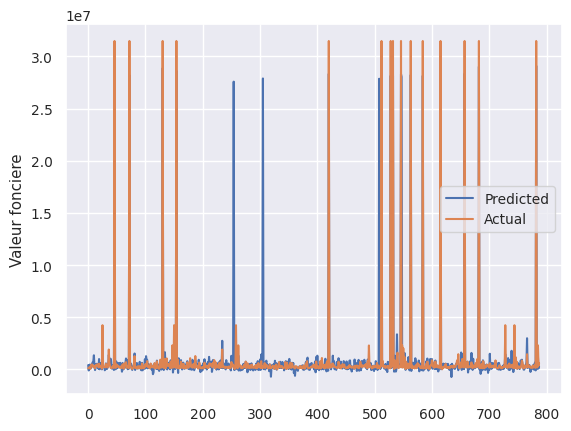

In [91]:
import matplotlib.pyplot as plt
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Valeur fonciere')

plt.legend()
plt.show()

In [92]:
r_square = linear_model.score(x_test, y_test)
r_square

0.7683514839722003